<a href="https://colab.research.google.com/github/kevinwanyama/NLP--Twitter-Sentiment-Analysis-/blob/main/stokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud
!pip install gensim
!pip install nltk
!pip install tensorflow

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [3]:
stock_df = pd.read_csv('stock_sentiment.csv')

In [4]:
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [5]:
stock_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [6]:
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [7]:
stock_df['Sentiment'].nunique()

2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


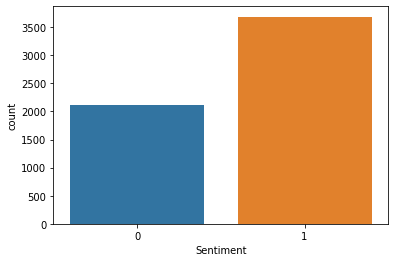

In [8]:
sns.countplot(stock_df['Sentiment'])

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [11]:
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

In [12]:
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [13]:
#remove stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [15]:
# Remove stopwords and remove short words that are less than 2 characters.
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [16]:
stock_df['Text Without Punc & Stopwords']=stock_df['Text Without Punctuation'].apply(preprocess)

In [17]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[user, aap, movie, return, feageed, indicator,..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[user, afraid, short, amzn, looking, like, nea..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, day, high, points,..."


In [18]:
#joining cleaned text into a string to create a word cloud.
stock_df['Joined_clean_txt'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

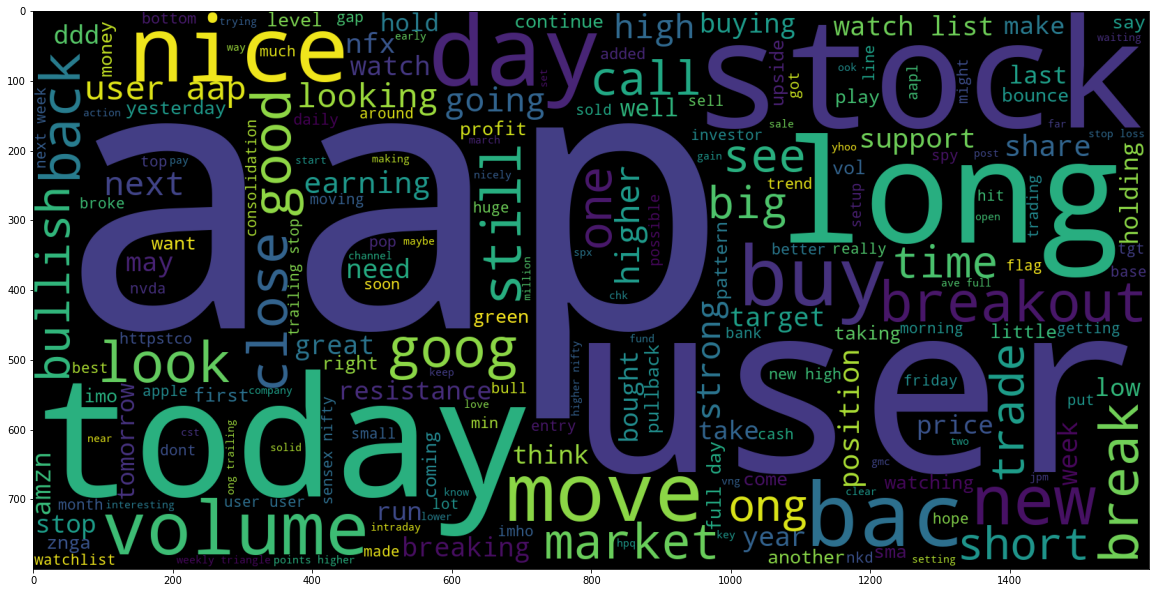

In [19]:
#word cloud for positive sentiments.
plt.figure(figsize = (20, 20)) 
wc=WordCloud(width=1600,height=800).generate(" ".join(stock_df[stock_df['Sentiment']==1]['Joined_clean_txt']))
plt.imshow(wc)

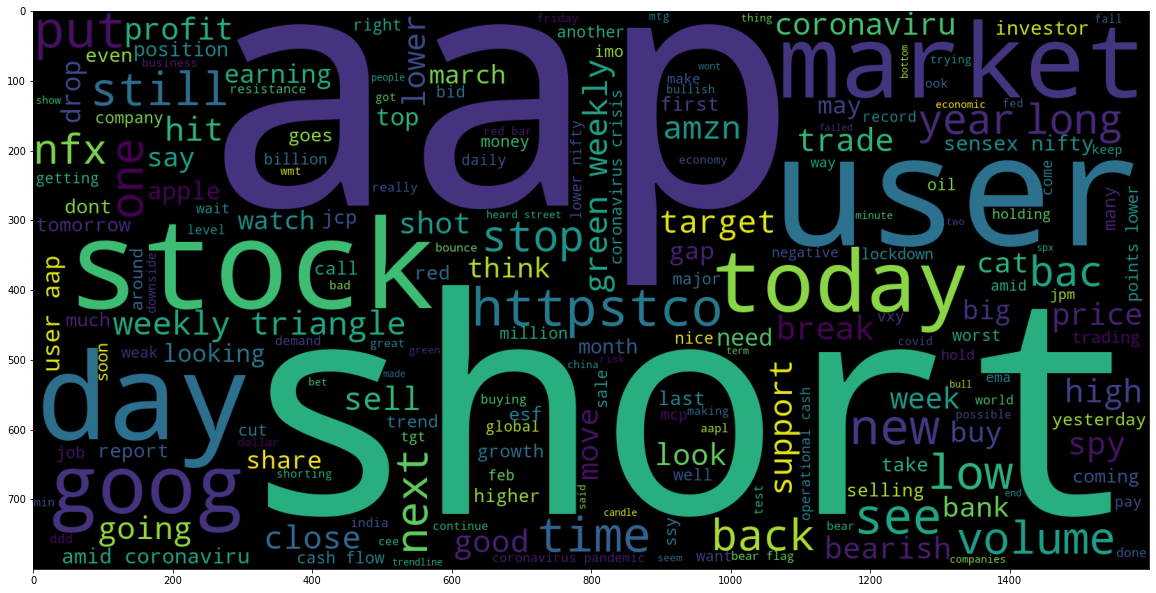

In [20]:
#word cloud for negative sentiments.
plt.figure(figsize = (20, 20)) 
wcn=WordCloud(width=1600,height=800).generate(" ".join(stock_df[stock_df['Sentiment']==0]['Joined_clean_txt']))
plt.imshow(wcn)

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#counting number of words in each line of text.
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Joined_clean_txt'] ]
tweets_length

[14,
 9,
 8,
 1,
 0,
 1,
 10,
 13,
 8,
 5,
 10,
 18,
 9,
 9,
 11,
 5,
 14,
 10,
 13,
 4,
 6,
 6,
 2,
 5,
 3,
 10,
 3,
 3,
 10,
 6,
 11,
 12,
 9,
 3,
 11,
 11,
 4,
 9,
 13,
 11,
 11,
 8,
 10,
 10,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 13,
 9,
 8,
 1,
 14,
 8,
 12,
 6,
 14,
 6,
 6,
 7,
 6,
 6,
 10,
 10,
 4,
 11,
 13,
 17,
 6,
 9,
 8,
 2,
 11,
 5,
 4,
 10,
 11,
 16,
 4,
 11,
 5,
 6,
 3,
 1,
 6,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 11,
 11,
 18,
 7,
 9,
 13,
 12,
 10,
 4,
 4,
 11,
 11,
 10,
 6,
 10,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 19,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 13,
 12,
 9,
 9,
 11,
 10,
 11,
 15,
 8,
 10,
 10,
 12,
 12,
 6,
 10,
 13,
 4,
 12,
 10,
 16,
 14,
 9,
 12,
 5,
 5,
 3,
 8,
 2,
 4,
 10,
 7,
 6,
 12,
 6,
 16,
 9,
 6,
 5,
 11,
 10,
 12,
 9,
 2,
 11,
 9,
 11,
 12,
 8,
 10,
 8,
 3,
 6,
 6,
 9,
 9,
 4,
 6,
 5,
 4,
 5,
 11,
 12,
 8,
 9,
 14,
 9,
 7,
 10,
 12,
 8,
 7,
 7,
 3,
 11,
 11,
 6,
 9,
 11,
 16,
 10,
 8,
 12,
 8,
 12,
 11,
 4,
 4,
 3,
 11,
 2,
 9,
 

<function matplotlib.pyplot.show>

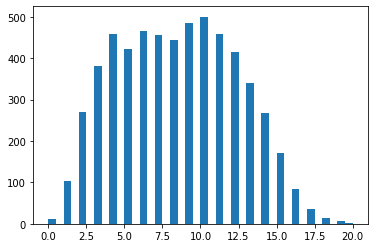

In [23]:
#distribution of tweets
plt.hist(tweets_length,bins=40)
plt.show

In [24]:
#tokenizing the dataset
list_of_words = []
for i in stock_df['Text Without Punc & Stopwords']:
  for j in i:
    list_of_words.append(j)


In [25]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'user',
 'aap',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'year',
 'awesome',
 'user',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'aap',
 'user',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'aap',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 '

In [26]:
#finding number of unique words
total_words = len(list(set(list_of_words)))
total_words

9277

In [27]:
#spliting model into train set and test set
X=stock_df['Text Without Punc & Stopwords']
y=stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [28]:
X_test.shape

(1159,)

In [29]:
X_train.shape

(4632,)

In [30]:
X_train

3897                                        [bac, coming]
3764    [personally, would, like, see, aap, share, imh...
1529                     [ddd, still, falling, premarket]
4759                          [darn, missed, bsft, short]
3805    [bac, next, breakout, based, tech, analysis, a...
                              ...                        
3662                                          [kex, took]
560                                        [good, volume]
4981    [jchengwsj, coronavirus, making, uschina, deco...
1978             [twx, ong, trailing, stop, prior, stops]
3735                 [gevo, target, short, price, action]
Name: Text Without Punc & Stopwords, Length: 4632, dtype: object

In [31]:
#tokenizing with a tokenizer.
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(X_train)

#tokenizing training data
train_sequences = tokenizer.texts_to_sequences(X_train)

#tokenizing testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [32]:
train_sequences

[[16, 105],
 [1399, 67, 7, 21, 1, 160, 228, 431, 1181, 67, 21, 799, 228],
 [74, 14, 432, 287],
 [3368, 540, 1706, 3],
 [16, 23, 37, 694, 695, 541, 118],
 [2, 800, 1, 410],
 [588, 3, 433],
 [16, 118, 2244, 288, 506, 1182, 161, 35, 106, 172, 119],
 [1183, 1707, 637, 886, 801, 3369, 2245, 3370, 3371, 3372, 1184, 3373, 3374],
 [1708, 1185, 1186, 13, 326, 469, 28, 10, 887, 27, 70],
 [888, 1400, 8, 75, 68, 162, 432, 696, 327, 274, 17, 266],
 [193, 3375, 1012, 194, 1709, 109],
 [163, 3376, 3377, 254, 275, 507, 411, 697, 3378, 349, 1013, 1187, 62],
 [1188, 153, 434, 383, 194, 289, 698, 64, 194, 2246, 35, 508, 8, 1401],
 [328, 44, 39, 236, 35, 119, 2247, 164, 1710, 162, 39],
 [237, 3379, 18, 20, 55, 1711, 165, 39, 64],
 [290, 303, 17, 638, 5, 10, 23, 291, 13],
 [889, 218, 4, 166, 45, 78, 1014, 212, 3380, 329],
 [2, 1, 1402, 120, 3381, 589, 23, 1189, 1012, 31, 3382, 1403, 3383],
 [435, 14, 699, 1015, 2248, 32, 110, 195, 470, 27],
 [2, 2249, 111, 177, 95, 471, 81, 3, 304],
 [16, 73, 472, 2250, 33

In [33]:
test_sequences

[[32, 74, 607, 435, 556, 166, 1444, 1225, 1042, 735, 193],
 [208, 49, 7, 588, 531],
 [2953, 5792, 1433, 445, 294, 69, 72, 25, 229, 3461],
 [689, 131, 1, 1084, 335, 129, 592, 145, 399, 288],
 [413, 121, 9, 214, 36, 22, 3028, 704, 1376],
 [18, 363, 59, 7386, 4, 8, 2],
 [7069, 69, 6, 2027, 318, 2783, 1200, 176, 1162, 1200, 3326, 1200, 1162, 1200],
 [25, 229, 3120, 1934, 179, 109, 155, 466, 1129],
 [1174, 79, 359],
 [1164, 719, 339, 351, 48, 965],
 [10, 146, 1, 2452, 117, 6109, 923, 341],
 [269, 186, 250, 66, 637, 63, 618, 22],
 [23, 32, 18, 449, 17, 1, 11, 35, 134, 214, 329, 119],
 [938, 145, 6, 343, 233, 42, 35, 232, 787, 221],
 [1688, 243, 15],
 [33, 546, 60, 38, 8091, 72, 25, 229],
 [25, 198, 801, 98, 6, 641, 1051, 133, 2090],
 [1, 7, 26, 1927, 279, 4, 183, 20, 52, 87, 7200, 1011, 67],
 [2, 1, 49, 7, 114, 32, 18, 157, 843],
 [2, 199, 270, 342, 209, 2704, 676, 199, 89],
 [2423, 41, 23, 182],
 [1, 5, 1030, 342, 7, 3578],
 [381, 1295, 403, 486, 181, 713],
 [1254, 2818, 2471, 450, 25, 943]

In [34]:
#padding on the training and testing sequences
padded_train= pad_sequences(train_sequences,maxlen=15,padding='post',truncating='post')
padded_test=pad_sequences(test_sequences,maxlen=15,truncating='post')

In [35]:
#changing data to 2D representation.
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [36]:
y_test_cat.shape

(1159, 2)

In [37]:
y_train_cat.shape

(4632, 2)

In [38]:
y_test_cat

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [39]:
#creating a training model
model = Sequential()

model.add(Embedding(total_words,output_dim = 512))
model.add(LSTM(256))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4749824   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,570,434
Trainable params: 5,570,434
Non-trainable params: 0
_________________________________________________________________


In [40]:
#training the model
model.fit(padded_train,y_train_cat,batch_size=32,validation_split=0.2,epochs=1)

116/116 [==============================] - 25s 200ms/step - loss: 0.6502 - acc: 0.6384 - val_loss: 0.5075 - val_acc: 0.7454


In [41]:
#making predictions
pred = model.predict(padded_test)

In [42]:
prediction=[]
for i in pred:
  prediction.append(np.argmax(i))

In [43]:
prediction

[1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


In [44]:
#original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [45]:
#accuracy score of the model.
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(original,prediction)
accuracy

0.7118205349439172

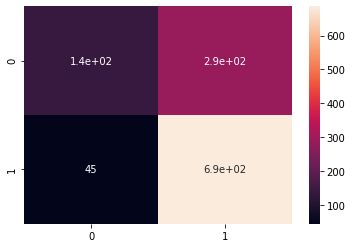

In [46]:
#ploting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(original,prediction)
sns.heatmap(cm,annot=True)